In [1]:
import json
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import chain
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Read data

In [36]:
# # Load the pickled list
# with open("/Utilisateurs/umushtaq/emotion_analysis_comics/incontext_learning/results/icl_llama-3-8b-Instruct-bnb-4bit/results_10.pickle", 'rb') as f:
    
#     results = pickle.load(f)

In [192]:
# Load the pickled list
with open("/Utilisateurs/umushtaq/emotion_analysis_comics/finetuning/saved_models/comics_Llama-3.2-1B-Instruct-bnb-4bit/comics_results_2.pickle", 'rb') as f:
    
    results = pickle.load(f)

In [193]:
all_labels = ["anger", "surprise", "fear", "disgust", "sadness", "joy", "neutral"]

In [194]:
grounds = results['ground_truths']
predictions = results['predictions']

In [195]:
len(grounds), len(predictions)

(1776, 1776)

In [196]:
grounds

['{"list_emotion_classes": ["Surprise", "Joy"]}',
 '{"list_emotion_classes": ["Joy"]}',
 '{"list_emotion_classes": ["Surprise", "Joy"]}',
 '{"list_emotion_classes": ["Joy"]}',
 '{"list_emotion_classes": ["Joy"]}',
 '{"list_emotion_classes": ["Joy"]}',
 '{"list_emotion_classes": ["Surprise"]}',
 '{"list_emotion_classes": ["Joy"]}',
 '{"list_emotion_classes": ["Joy"]}',
 '{"list_emotion_classes": [["Neutral"]]}',
 '{"list_emotion_classes": [["Neutral"]]}',
 '{"list_emotion_classes": [["Neutral"]]}',
 '{"list_emotion_classes": [["Neutral"]]}',
 '{"list_emotion_classes": ["Anger", "Disgust"]}',
 '{"list_emotion_classes": ["Anger", "Disgust"]}',
 '{"list_emotion_classes": [["Neutral"]]}',
 '{"list_emotion_classes": ["Sadness"]}',
 '{"list_emotion_classes": ["Sadness"]}',
 '{"list_emotion_classes": ["Anger", "Sadness"]}',
 '{"list_emotion_classes": ["Anger", "Sadness"]}',
 '{"list_emotion_classes": ["Anger", "Sadness"]}',
 '{"list_emotion_classes": ["Fear", "Surprise"]}',
 '{"list_emotion_cl

In [197]:
predictions

[{'role': 'assistant', 'content': '{"list_emotion_classes": ["Surprise"]}'},
 {'role': 'assistant', 'content': '{"list_emotion_classes": ["Surprise"]}'},
 {'role': 'assistant',
  'content': '{"list_emotion_classes": ["Fear", "Surprise"]}'},
 {'role': 'assistant', 'content': '{"list_emotion_classes": ["Joy"]}'},
 {'role': 'assistant', 'content': '{"list_emotion_classes": ["Joy"]}'},
 {'role': 'assistant', 'content': '{"list_emotion_classes": ["Joy"]}'},
 {'role': 'assistant',
  'content': '{"list_emotion_classes": ["Fear", "Surprise"]}'},
 {'role': 'assistant', 'content': '{"list_emotion_classes": ["Joy"]}'},
 {'role': 'assistant', 'content': '{"list_emotion_classes": ["Joy"]}'},
 {'role': 'assistant', 'content': '{"list_emotion_classes": ["Joy"]}'},
 {'role': 'assistant', 'content': '{"list_emotion_classes": ["Joy"]}'},
 {'role': 'assistant', 'content': '{"list_emotion_classes": ["Joy"]}'},
 {'role': 'assistant', 'content': '{"list_emotion_classes": ["Sadness"]}'},
 {'role': 'assistant

In [198]:
grounds = [json.loads(x)["list_emotion_classes"] for x in grounds]

In [199]:
predictions = [json.loads(x["content"]) for x in predictions]

In [200]:
predictions = [x['list_emotion_classes'] for x in predictions]

In [201]:
len(grounds), len(predictions)

(1776, 1776)

In [228]:
predictions

[['Surprise', None],
 ['Surprise'],
 ['Fear', 'Surprise'],
 ['Joy'],
 ['Joy'],
 ['Joy'],
 ['Fear'],
 ['Joy'],
 ['Joy'],
 ['Joy'],
 ['Joy'],
 ['Joy'],
 ['Sadness'],
 ['Anger', 'Fear'],
 ['Anger', None],
 ['Joy'],
 ['Fear'],
 ['Fear'],
 ['Anger', 'Sadness'],
 ['Sadness', None],
 ['Anger', None],
 ['Fear', 'Surprise'],
 ['Surprise'],
 ['Joy'],
 ['Surprise', None],
 ['Anger'],
 ['Joy'],
 ['Joy'],
 ['Anger'],
 ['Anger'],
 ['Joy', None],
 ['Surprise', None],
 ['Joy', None],
 ['Anger', 'Surprise'],
 ['Anger', 'Disgust'],
 ['Sadness', None],
 ['Anger', None],
 ['Sadness', None],
 ['Fear', 'Surprise', None],
 ['Joy'],
 ['Anger'],
 ['Joy', None],
 ['Surprise', None],
 ['Anger', 'Fear'],
 ['Joy'],
 ['Anger'],
 ['Anger'],
 ['Anger'],
 ['Anger', 'Disgust'],
 ['Fear'],
 ['Anger'],
 ['Anger', 'Fear'],
 ['Joy', None],
 ['Anger', 'Disgust'],
 ['Anger', 'Surprise'],
 ['Anger'],
 ['Joy'],
 ['Joy'],
 ['Anger'],
 ['Anger'],
 ['Fear'],
 ['Fear', 'Sadness', None],
 ['Joy'],
 ['Anger'],
 ['Fear', 'Sadness'],


In [203]:
grounds_l = [len(element) for element in grounds]
predictions_l = [len(element) for element in predictions]

In [204]:
counts_grounds = Counter(grounds_l)
counts_predictions = Counter(predictions_l)

In [205]:
counts_grounds

Counter({1: 1119, 2: 594, 3: 62, 4: 1})

In [206]:
counts_predictions

Counter({1: 1088, 2: 620, 3: 68})

In [207]:
#single_pred_idxs = [idx for idx,elem in enumerate(grounds) if len(elem) == 1]

In [208]:
#len(single_pred_idxs)

In [209]:
#grounds = [elem for idx, elem in enumerate(grounds) if idx in single_pred_idxs]
#predictions = [elem for elem in predictions if len(elem) == 1]

In [210]:
#len(grounds), len(predictions)

In [211]:
grounds

[['Surprise', 'Joy'],
 ['Joy'],
 ['Surprise', 'Joy'],
 ['Joy'],
 ['Joy'],
 ['Joy'],
 ['Surprise'],
 ['Joy'],
 ['Joy'],
 [['Neutral']],
 [['Neutral']],
 [['Neutral']],
 [['Neutral']],
 ['Anger', 'Disgust'],
 ['Anger', 'Disgust'],
 [['Neutral']],
 ['Sadness'],
 ['Sadness'],
 ['Anger', 'Sadness'],
 ['Anger', 'Sadness'],
 ['Anger', 'Sadness'],
 ['Fear', 'Surprise'],
 ['Surprise'],
 ['Joy'],
 ['Anger', 'Surprise'],
 ['Joy'],
 ['Joy'],
 ['Joy'],
 ['Anger'],
 ['Anger'],
 ['Surprise', 'Joy'],
 ['Fear', 'Sadness'],
 ['Fear', 'Sadness'],
 ['Fear', 'Surprise'],
 ['Anger', 'Disgust'],
 ['Anger', 'Disgust'],
 ['Anger', 'Disgust'],
 ['Fear', 'Sadness'],
 ['Fear', 'Sadness', 'Surprise'],
 ['Sadness'],
 ['Sadness'],
 ['Fear', 'Sadness'],
 ['Sadness', 'Surprise'],
 ['Sadness', 'Surprise'],
 ['Joy'],
 ['Anger'],
 ['Anger'],
 ['Anger'],
 ['Anger', 'Disgust'],
 ['Joy'],
 ['Joy'],
 ['Surprise', 'Joy'],
 ['Surprise', 'Joy'],
 ['Anger', 'Surprise'],
 ['Anger', 'Surprise'],
 [['Neutral']],
 ['Joy'],
 ['Joy'],

In [212]:
grounds

[['Surprise', 'Joy'],
 ['Joy'],
 ['Surprise', 'Joy'],
 ['Joy'],
 ['Joy'],
 ['Joy'],
 ['Surprise'],
 ['Joy'],
 ['Joy'],
 [['Neutral']],
 [['Neutral']],
 [['Neutral']],
 [['Neutral']],
 ['Anger', 'Disgust'],
 ['Anger', 'Disgust'],
 [['Neutral']],
 ['Sadness'],
 ['Sadness'],
 ['Anger', 'Sadness'],
 ['Anger', 'Sadness'],
 ['Anger', 'Sadness'],
 ['Fear', 'Surprise'],
 ['Surprise'],
 ['Joy'],
 ['Anger', 'Surprise'],
 ['Joy'],
 ['Joy'],
 ['Joy'],
 ['Anger'],
 ['Anger'],
 ['Surprise', 'Joy'],
 ['Fear', 'Sadness'],
 ['Fear', 'Sadness'],
 ['Fear', 'Surprise'],
 ['Anger', 'Disgust'],
 ['Anger', 'Disgust'],
 ['Anger', 'Disgust'],
 ['Fear', 'Sadness'],
 ['Fear', 'Sadness', 'Surprise'],
 ['Sadness'],
 ['Sadness'],
 ['Fear', 'Sadness'],
 ['Sadness', 'Surprise'],
 ['Sadness', 'Surprise'],
 ['Joy'],
 ['Anger'],
 ['Anger'],
 ['Anger'],
 ['Anger', 'Disgust'],
 ['Joy'],
 ['Joy'],
 ['Surprise', 'Joy'],
 ['Surprise', 'Joy'],
 ['Anger', 'Surprise'],
 ['Anger', 'Surprise'],
 [['Neutral']],
 ['Joy'],
 ['Joy'],

In [213]:
# def flatten_list(mixed_list):
#     flattened = []
#     for item in mixed_list:
#         if isinstance(item, list):
#             flattened.extend(flatten_list(item))  # Recursively flatten sublists
#         else:
#             flattened.append(item)
#     return flattened

In [214]:
# grounds = flatten_list(grounds)

In [215]:
# def labels_to_binary_matrix(label_list, all_labels):
#     binary_matrix = np.zeros((len(label_list), len(all_labels)))
    
#     for i, labels in enumerate(label_list):
#         for label in labels:
#             if label in all_labels:
#                 binary_matrix[i][all_labels.index(label)] = 1
                
#     return binary_matrix

def opposite(component_type):

    if component_type == "anger":
        return "surprise"
    elif component_type == "disgust":
        return "joy"
    elif component_type == "fear":
        return "sadness"
    elif component_type == "sadness":
        return "anger"
    elif component_type == "surprise":
        return "disgust"
    elif component_type == "joy":
        return "fear"
    elif component_type == "Neutral":
        return "sadness"
    

def harmonize_preds(grounds, preds):

    l1, l2 = len(preds), len(grounds)
    if l1 < l2:
        diff = l2 - l1
        preds = preds + [opposite(x) for x in grounds[l1:]]
    else:
        preds = preds[:l2]
        
    return preds 

def post_process_icl(grounds, preds):

    for i,(x,y) in enumerate(zip(grounds, preds)):
        
        if len(x) != len(y):
            
            preds[i] = harmonize_preds(x, y)

    #true_matrix = labels_to_binary_matrix(grounds, all_labels)
    #predicted_matrix = labels_to_binary_matrix(preds, all_labels)

    return grounds, preds

In [216]:
true_matrix, predicted_matrix = post_process_icl(grounds, predictions)

In [217]:
true_matrix = [item for sublist in true_matrix for item in sublist]
predicted_matrix = [item for sublist in predicted_matrix for item in sublist]

In [218]:
len(true_matrix), len(predicted_matrix)

(2497, 2497)

In [219]:
def flatten_list(mixed_list):
    flattened = []
    for item in mixed_list:
        if isinstance(item, list):
            flattened.extend(flatten_list(item))  # Recursively flatten sublists
        else:
            flattened.append(item)
    return flattened

In [220]:
true_matrix = flatten_list(true_matrix)

In [221]:
# true_matrix = [str(elem) for elem in true_matrix]
# predicted_matrix = [str(elem) for elem in predicted_matrix]

In [222]:
set(true_matrix)

{'Anger', 'Disgust', 'Fear', 'Joy', 'Neutral', 'Sadness', 'Surprise'}

In [223]:
set(predicted_matrix)

{'Anger', 'Disgust', 'Fear', 'Joy', None, 'Sadness', 'Surprise'}

In [224]:
counts_grounds = Counter(true_matrix)
counts_predictions = Counter(predicted_matrix)

In [225]:
counts_grounds

Counter({'Anger': 614,
         'Surprise': 486,
         'Joy': 429,
         'Fear': 407,
         'Sadness': 347,
         'Neutral': 129,
         'Disgust': 85})

In [226]:
counts_predictions

Counter({'Anger': 590,
         'Fear': 437,
         None: 403,
         'Joy': 401,
         'Surprise': 371,
         'Sadness': 253,
         'Disgust': 42})

## Classification Report

In [227]:
print(classification_report(true_matrix, predicted_matrix, labels=all_labels, target_names=all_labels, digits=3))

TypeError: '<' not supported between instances of 'NoneType' and 'str'

### Confusion Matrix

In [23]:
def get_confusion_matrices(grounds, predictions, all_labels):
    # Create a dictionary to map allowed labels to indices
    label_to_index = {label: idx for idx, label in enumerate(all_labels)}
    
    # Initialize one-hot encoded arrays for ground truths and predictions
    y_true = np.zeros((len(grounds), len(all_labels)), dtype=int)
    y_pred = np.zeros((len(predictions), len(all_labels)), dtype=int)
    
    # One-hot encode the ground truths (use only allowed labels)
    for i, labels in enumerate(grounds):
        for label in labels:
            if label in label_to_index:
                y_true[i][label_to_index[label]] = 1
    
    # One-hot encode the predictions, setting any unallowed label as false (0)
    for i, labels in enumerate(predictions):
        for label in labels:
            if label in label_to_index:
                y_pred[i][label_to_index[label]] = 1
    
    # Generate confusion matrices for each label in the desired structure
    confusion_matrices = {}
    for label, idx in label_to_index.items():
        # Get the confusion matrix from sklearn
        cm = confusion_matrix(y_true[:, idx], y_pred[:, idx])
        
        # Rearrange the confusion matrix to the requested structure: TP FP, FN TN
        tp = cm[1, 1]  # True Positive
        fp = cm[0, 1]  # False Positive
        fn = cm[1, 0]  # False Negative
        tn = cm[0, 0]  # True Negative
        
        # Create a matrix with the desired structure
        rearranged_cm = np.array([[tp, fp], [fn, tn]])
        confusion_matrices[label] = rearranged_cm
    
    return confusion_matrices

In [24]:
confusion_matrices = get_confusion_matrices(grounds, predictions, all_labels)

In [25]:
for label, cm in confusion_matrices.items():
    print(f"Confusion Matrix for label '{label}':\n{cm}\n")

Confusion Matrix for label 'anger':
[[ 36  29]
 [ 75 303]]

Confusion Matrix for label 'surprise':
[[ 58  44]
 [ 44 297]]

Confusion Matrix for label 'fear':
[[  8  31]
 [ 66 338]]

Confusion Matrix for label 'disgust':
[[  0  52]
 [ 15 376]]

Confusion Matrix for label 'sadness':
[[ 10  23]
 [ 69 341]]

Confusion Matrix for label 'joy':
[[106  76]
 [ 45 216]]

Confusion Matrix for label 'neutral':
[[ 25  70]
 [ 17 331]]



### Plots

In [26]:
def plot_confusion_matrices(confusion_matrices, all_labels):
    # Set up a grid for plotting confusion matrices
    num_labels = len(all_labels)
    fig, axes = plt.subplots(1, num_labels, figsize=(4 * num_labels, 4))
    
    if num_labels == 1:
        axes = [axes]  # Ensure axes is always iterable
    
    # Plot each confusion matrix
    for i, (label, cm) in enumerate(confusion_matrices.items()):
        # Create a heatmap for the confusion matrix
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
        
        # Set titles and labels
        axes[i].set_title(f'Confusion Matrix: {label}', fontsize=12)
        axes[i].set_xlabel('Predicted', fontsize=10)
        axes[i].set_ylabel('Actual', fontsize=10)
        
        # Customize x and y ticks
        axes[i].set_xticklabels(['Positive', 'Negative'])
        axes[i].set_yticklabels(['Positive', 'Negative'], rotation=0)
    
    plt.tight_layout()
    plt.show()

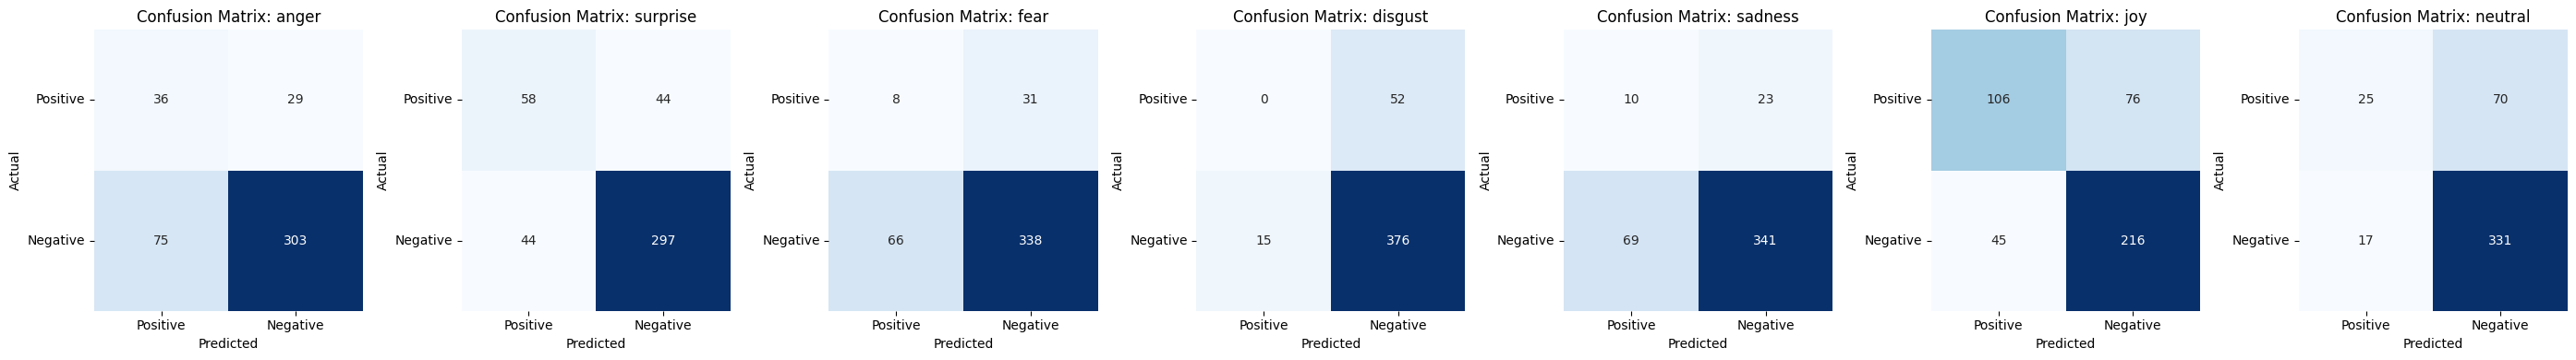

In [27]:
plot_confusion_matrices(confusion_matrices, all_labels)

In [28]:
def get_flattened_labels(grounds, predictions, all_labels):
    """
    Convert multi-label data into flat arrays of class indices.
    """
    y_true_flat = []
    y_pred_flat = []
    
    # Create a mapping from labels to indices
    label_to_index = {label: idx for idx, label in enumerate(all_labels)}
    
    # Flatten y_true and y_pred into class indices
    for true_labels, pred_labels in zip(grounds, predictions):
        true_one_hot = [0] * len(all_labels)
        pred_one_hot = [0] * len(all_labels)
        
        for label in true_labels:
            if label in label_to_index:
                true_one_hot[label_to_index[label]] = 1
        
        for label in pred_labels:
            if label in label_to_index:
                pred_one_hot[label_to_index[label]] = 1
        
        # Append the indices for the predicted and true labels
        y_true_flat.append(true_one_hot)
        y_pred_flat.append(pred_one_hot)
    
    return np.array(y_true_flat), np.array(y_pred_flat)

def plot_multi_class_confusion_matrix(y_true, y_pred, all_labels):
    """
    Plot a multi-class confusion matrix using the true and predicted labels.
    """
    # Flatten the multi-label arrays into single-label arrays
    y_true_flat = np.argmax(y_true, axis=1)
    y_pred_flat = np.argmax(y_pred, axis=1)

    # Compute the confusion matrix for multi-class classification
    cm = confusion_matrix(y_true_flat, y_pred_flat)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=all_labels, yticklabels=all_labels)
    
    # Set labels and title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Multi-Class Confusion Matrix')
    plt.show()


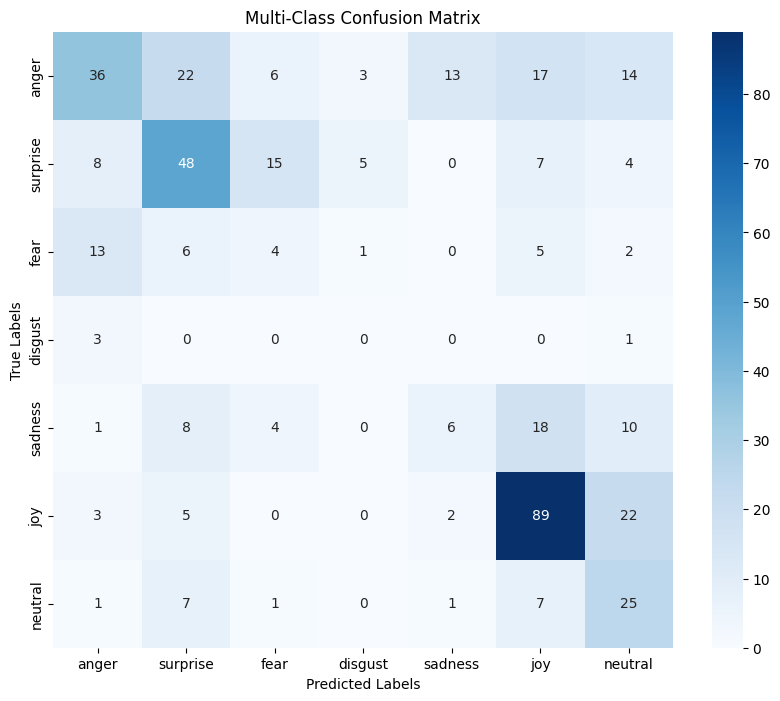

In [29]:
# Convert multi-label ground truth and predictions into flat labels
y_true, y_pred = get_flattened_labels(grounds, predictions, all_labels)

# Plot the multi-class confusion matrix
plot_multi_class_confusion_matrix(y_true, y_pred, all_labels)


In [47]:
from collections import Counter

def count_labels(grounds, all_labels):
    # Flatten the list of lists into a single list of labels
    all_true_labels = list(chain.from_iterable(grounds))
    
    # Use Counter to count occurrences of each label
    label_counts = Counter(all_true_labels)
    
    # Display counts for all labels in all_labels
    counts_display = {label: label_counts.get(label, 0) for label in all_labels}
    
    return counts_display



In [48]:
label_counts = count_labels(grounds, all_labels)

# Print the counts
for label, count in label_counts.items():
    print(f"Label '{label}': {count}")

Label 'anger': 614
Label 'surprise': 486
Label 'fear': 407
Label 'disgust': 85
Label 'sadness': 347
Label 'joy': 429
Label 'neutral': 129


In [49]:
from collections import Counter
from itertools import chain

def count_labels(predictions, all_labels):
    # Flatten the list of lists into a single list of labels
    all_predicted_labels = list(chain.from_iterable(predictions))
    
    # Use Counter to count occurrences of each label
    label_counts = Counter(all_predicted_labels)
    
    # Display counts for all labels in all_labels, ignoring any extra labels
    counts_display = {label: label_counts.get(label, 0) for label in all_labels}
    
    return counts_display

# Example usage
all_labels = ["anger", "surprise", "fear", "disgust", "sadness", "joy", "neutral"]
#predictions = [['joy', 'happiness'], ['fear'], ['sadness', 'disgust'], ['neutral', 'fear', 'excitement']]

In [50]:
label_counts = count_labels(predictions, all_labels)

# Print the counts
for label, count in label_counts.items():
    print(f"Label '{label}': {count}")

Label 'anger': 556
Label 'surprise': 919
Label 'fear': 433
Label 'disgust': 191
Label 'sadness': 335
Label 'joy': 575
Label 'neutral': 253
